In [1]:
import h5py 
from os.path import join as opj
import numpy as np

In [3]:
file_name = "/shared/antoniom/buildCATHDataset/all_data_unique_h5/mdcath_analysis.h5"
data = h5py.File(file_name, 'r')
print(f"Total number of samples: {len(data.keys())}")

Total number of samples: 5398


In [4]:
pdb = '12asA00'
temp = '450'
repl = '0'

In [5]:
data[pdb].keys()

<KeysViewHDF5 ['320', '348', '379', '413', '450']>

In [6]:
for k in data[pdb].attrs.keys():
    print(k, data[pdb].attrs[k])

numChains 1
numNoHAtoms 2563
numProteinAtoms 5091
numResidues 327


In [7]:
data[pdb][temp].keys()

<KeysViewHDF5 ['0', '1', '2', '3', '4']>

In [8]:
for k in data[pdb][temp][repl].attrs.keys():
    print(k, data[pdb][temp][repl].attrs[k])

alpha 29.96941896024465
beta 18.654434250764528
coil 51.37614678899083
numFrames 440


In [9]:
for dat in data[pdb][temp][repl].keys():
    print(dat, data[pdb][temp][repl][dat].shape)

box (3, 3)
gyration_radius (440,)
rmsd (440,)
rmsf (327,)
solid_secondary_structure (440,)


In [10]:
if 'mdcath_analysis' in file_name:
    ssd = data[pdb][temp][repl]['solid_secondary_structure'][:]
    gyration = data[pdb][temp][repl]['gyration_radius'][:]
    rmsf = data[pdb][temp][repl]['rmsf'][:]
    print(ssd.shape, gyration.shape)

(440,) (440,)


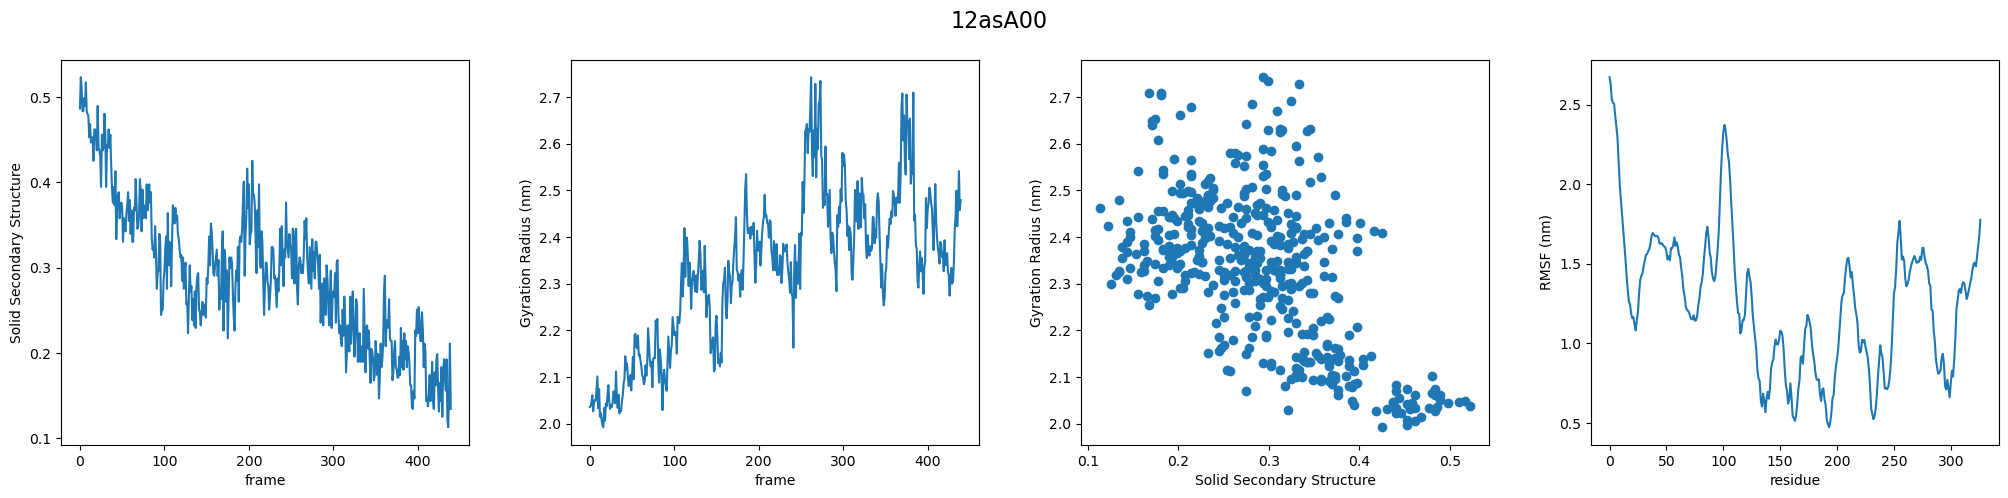

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axs = plt.subplots(1, 4, figsize=(25, 5))
if 'mdcath_analysis' in file_name:
    axs[0].plot(ssd)
    axs[0].set_ylabel('Solid Secondary Structure')
    axs[0].set_xlabel('frame')

    axs[1].plot(gyration)
    axs[1].set_ylabel('Gyration Radius (nm)')
    axs[1].set_xlabel('frame')

    axs[2].scatter(ssd, gyration)
    axs[2].set_xlabel('Solid Secondary Structure')
    axs[2].set_ylabel('Gyration Radius (nm)')

    axs[3].plot(rmsf)
    axs[3].set_ylabel('RMSF (nm)')
    axs[3].set_xlabel('residue')
    fig.suptitle(f"{pdb}", fontsize=16)

    plt.subplots_adjust(wspace=0.25)
    plt.show()